# Linear and Polynomial Regression

## Exploratory Analysis

In [1]:
import pandas as pd
import financialanalysis as fa # 'pip install financialanalysis' in terminal if you don't have it

df = pd.read_csv('./TSLA.csv')
df.Date = pd.to_datetime(df.Date)
df.Date = fa.datetimeToFloatyear(df.Date)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010.490411,3.800,5.000,3.508,4.778,4.778,93831500
1,2010.493151,5.158,6.084,4.660,4.766,4.766,85935500
2,2010.495890,5.000,5.184,4.054,4.392,4.392,41094000
3,2010.498630,4.600,4.620,3.742,3.840,3.840,25699000
4,2010.509589,4.000,4.000,3.166,3.222,3.222,34334500


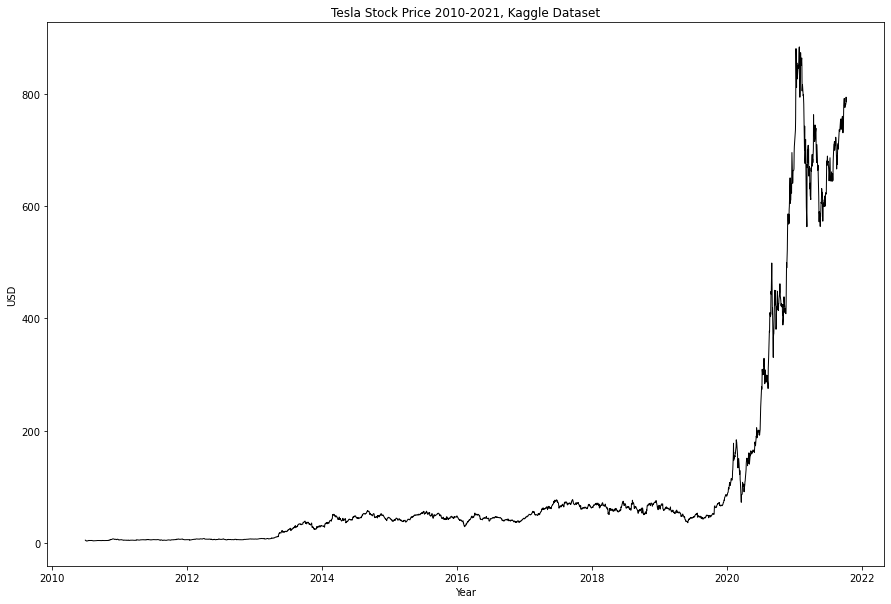

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.plot(df.Date, df.Close, color='black',linewidth=1)
plt.xlabel('Year')
plt.ylabel('USD')
plt.title('Tesla Stock Price 2010-2021, Kaggle Dataset')
plt.show()

<AxesSubplot:>

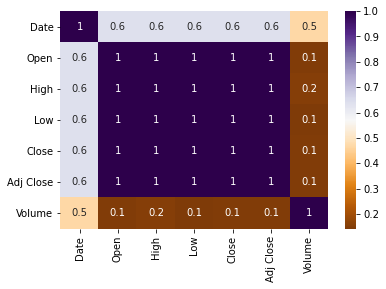

In [3]:
import seaborn as sns

sns.heatmap(df.corr(), annot = True, fmt='.1g', cmap= 'PuOr')

We can see that the open, close, high and low prices are highly correlated.

## Pairplot

Not sure how informative this is

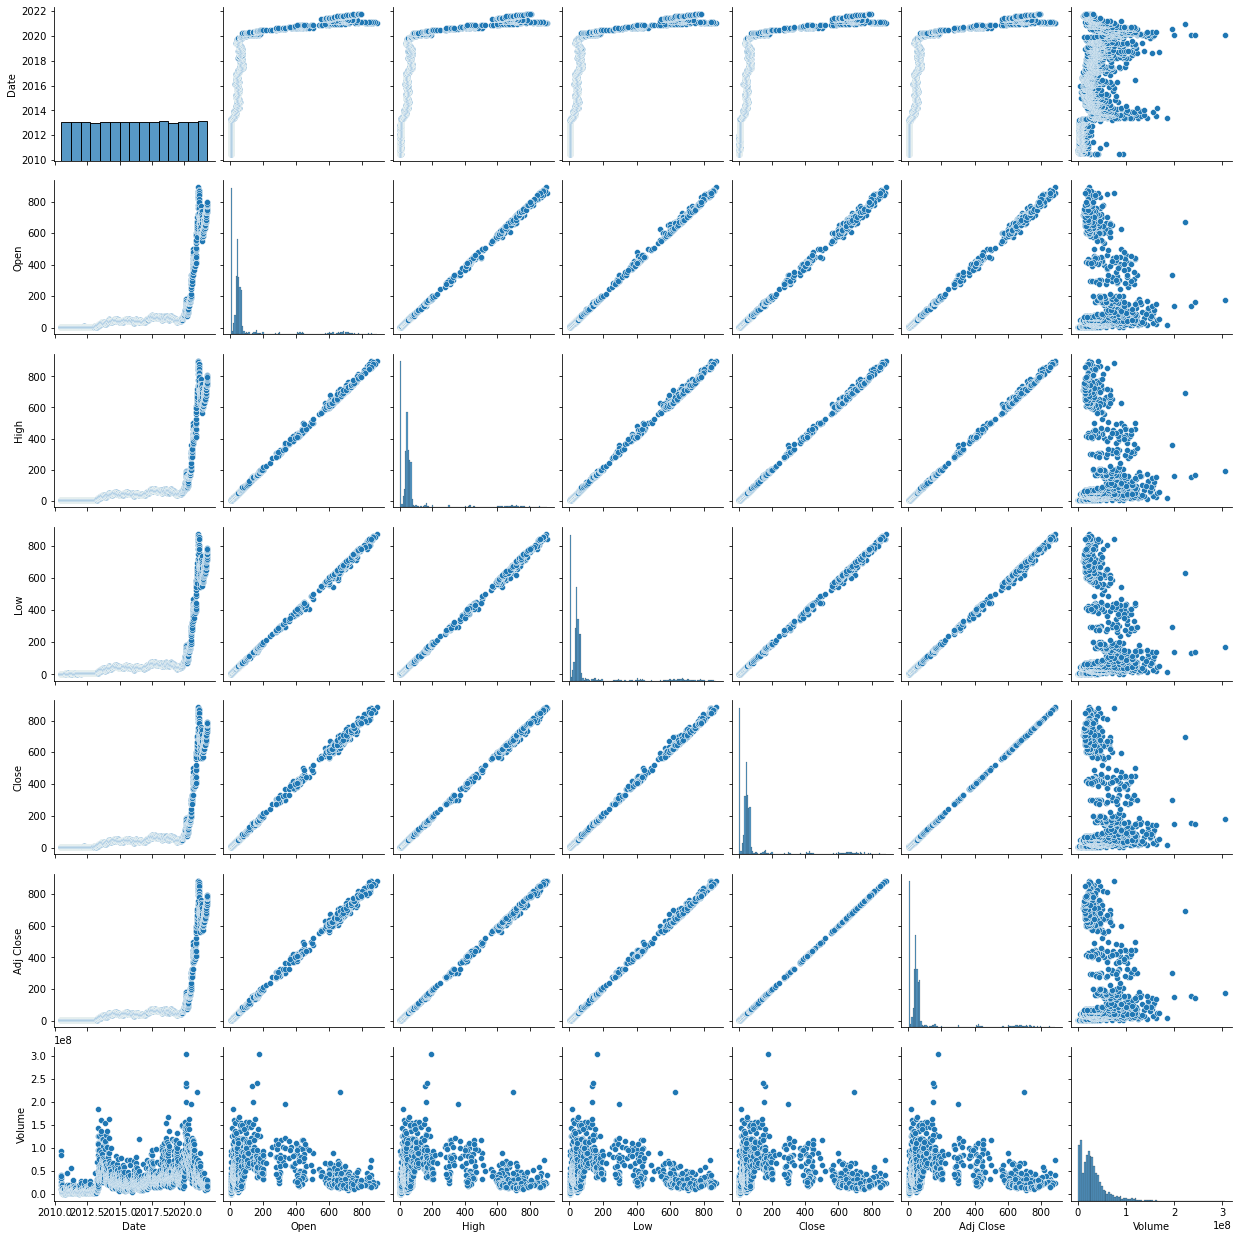

In [4]:
sns.pairplot(data=df)

## Linear and Polynomial Regression

### Splitting Dataset

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=21)

# Need to be sorted for polynomial regression to work properly
train = train.sort_values(by=['Date'])
test = test.sort_values(by=['Date'])
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010.490411,3.800,5.000,3.508,4.778,4.778,93831500
1,2010.493151,5.158,6.084,4.660,4.766,4.766,85935500
2,2010.495890,5.000,5.184,4.054,4.392,4.392,41094000
3,2010.498630,4.600,4.620,3.742,3.840,3.840,25699000
5,2010.512329,3.280,3.326,2.996,3.160,3.160,34608500


### Simple Linear Regression
Below is a simple linear regression model that predicts the closing price ``Close`` using the ``Date``.

Linear regression, testing Mean Squared Error: 0.5891


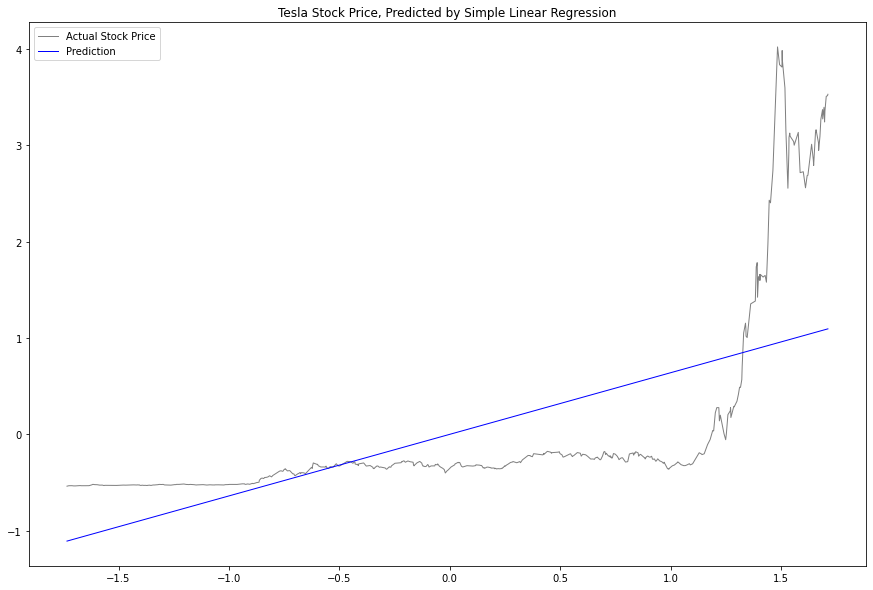

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np

X_train, X_test = train['Date'], test['Date']
y_train, y_test = train['Close'], test['Close']

# Reshape data (sklearn gets mad if I don't)
X_train = StandardScaler().fit_transform(X_train.values.reshape(-1,1))
y_train = StandardScaler().fit_transform(y_train.values.reshape(-1,1))
X_test = StandardScaler().fit_transform(X_test.values.reshape(-1,1))
y_test = StandardScaler().fit_transform(y_test.values.reshape(-1,1))

# Fit linear model, run, calc MSE
lin_model = LinearRegression().fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
print('Linear regression, testing Mean Squared Error: {:.4f}'.format(metrics.mean_squared_error(y_test, y_pred)))

plt.figure(figsize=(15,10))
plt.plot(X_test, y_test, color='gray', linewidth=1)
plt.title('Tesla Stock Price, Predicted by Simple Linear Regression')
plt.plot(X_test, y_pred, color='blue', linewidth=1)
plt.legend(['Actual Stock Price','Prediction'])
plt.show()

### Polynomial Regression
Polynomial regression models that predicts ``Close`` with the ``Date``

Degree 2, training MSE: 0.33918 and testing MSE: 0.32282
Degree 10, training MSE: 0.03856 and testing MSE: 0.03689
Degree 20, training MSE: 0.01632 and testing MSE: 0.01834
Degree 20, training MSE: 0.01412 and testing MSE: 0.01651
Degree 50, training MSE: 0.00909 and testing MSE: 0.01677


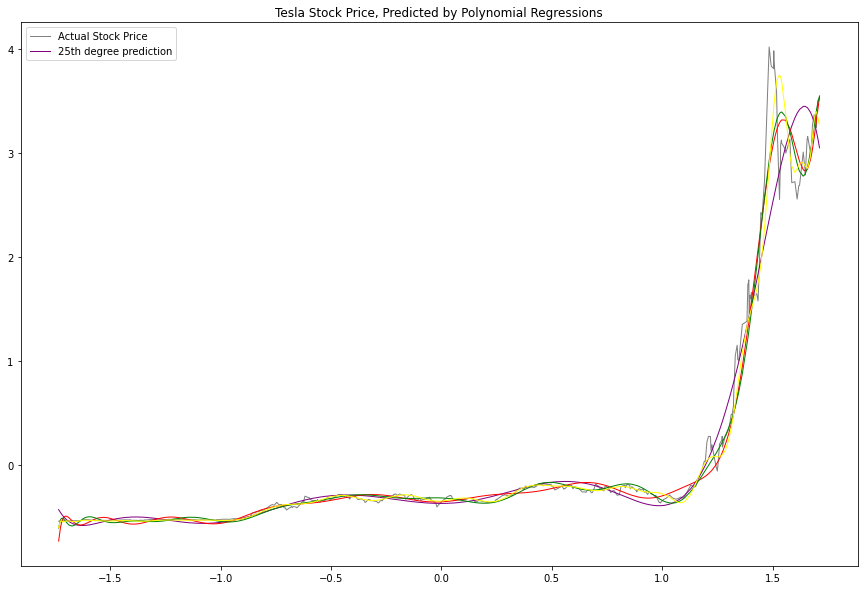

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Degree 2
polyreg = make_pipeline(PolynomialFeatures(2), StandardScaler(), LinearRegression())
polyreg.fit(X_train, y_train)
y_pred = polyreg.predict(X_train)
train2 = metrics.mean_squared_error(y_train, y_pred)
y_pred2 = polyreg.predict(X_test)
test2 = metrics.mean_squared_error(y_test, y_pred2)

# Degree 10
polyreg = make_pipeline(PolynomialFeatures(10), StandardScaler(), LinearRegression())
polyreg.fit(X_train, y_train)
y_pred = polyreg.predict(X_train)
train10 = metrics.mean_squared_error(y_train, y_pred)
y_pred10 = polyreg.predict(X_test)
test10 = metrics.mean_squared_error(y_test, y_pred10)

# Degree 20
polyreg = make_pipeline(PolynomialFeatures(20), StandardScaler(), LinearRegression())
polyreg.fit(X_train, y_train)
y_pred = polyreg.predict(X_train)
train20 = metrics.mean_squared_error(y_train, y_pred)
y_pred20 = polyreg.predict(X_test)
test20 = metrics.mean_squared_error(y_test, y_pred20)

# Degree 25
polyreg = make_pipeline(PolynomialFeatures(25), StandardScaler(), LinearRegression())
polyreg.fit(X_train, y_train)
y_pred = polyreg.predict(X_train)
train25 = metrics.mean_squared_error(y_train, y_pred)
y_pred25 = polyreg.predict(X_test)
test25 = metrics.mean_squared_error(y_test, y_pred25)

# Degree 50
polyreg = make_pipeline(PolynomialFeatures(50), StandardScaler(), LinearRegression())
polyreg.fit(X_train, y_train)
y_pred = polyreg.predict(X_train)
train50 = metrics.mean_squared_error(y_train, y_pred)
y_pred50 = polyreg.predict(X_test)
test50 = metrics.mean_squared_error(y_test, y_pred50)

print('Degree 2, training MSE: {:.5f} and testing MSE: {:.5f}'.format(train2, test2))
print('Degree 10, training MSE: {:.5f} and testing MSE: {:.5f}'.format(train10, test10))
print('Degree 20, training MSE: {:.5f} and testing MSE: {:.5f}'.format(train20, test20))
print('Degree 20, training MSE: {:.5f} and testing MSE: {:.5f}'.format(train25, test25))
print('Degree 50, training MSE: {:.5f} and testing MSE: {:.5f}'.format(train50, test50))

plt.figure(figsize=(15,10))
plt.title('Tesla Stock Price, Predicted by Polynomial Regressions')
plt.plot(X_test, y_test, color='gray', linewidth=1)
plt.plot(X_test, y_pred10, color='purple', linewidth=1)
plt.plot(X_test, y_pred20, color='red', linewidth=1)
plt.plot(X_test, y_pred25, color='green', linewidth=1)
plt.plot(X_test, y_pred50, color='yellow', linewidth=1)
plt.legend(['Actual Stock Price','25th degree prediction'])
plt.show()

### Overfitting

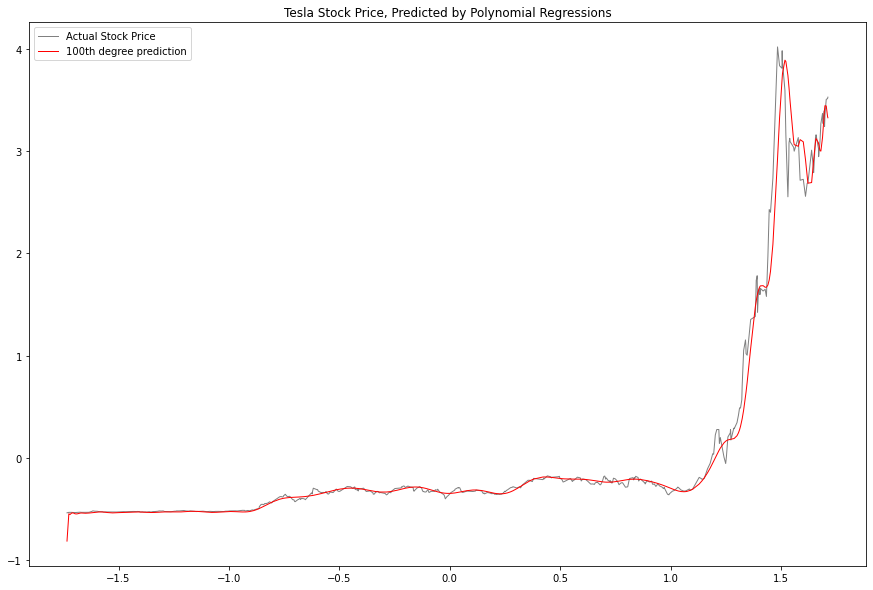

In [27]:

# Degree 1000
polyreg = make_pipeline(PolynomialFeatures(100), StandardScaler(), LinearRegression())
polyreg.fit(X_train, y_train)
y_pred = polyreg.predict(X_train)
train100 = metrics.mean_squared_error(y_train, y_pred)
y_pred100 = polyreg.predict(X_test)
test100 = metrics.mean_squared_error(y_test, y_pred500)

plt.figure(figsize=(15,10))
plt.title('Tesla Stock Price, Predicted by Polynomial Regressions')
plt.plot(X_test, y_test, color='gray', linewidth=1)
plt.plot(X_test, y_pred100, color='red', linewidth=1)
plt.legend(['Actual Stock Price','100th degree prediction'])
plt.show()

### Polynomial Regression 

Polynomial regression models that predicts ``Close`` with the ``Open``

In [30]:
X_train2, X_test2 = train['Open'], test['Open']
y_train2, y_test2 = train['Close'], test['Close']

X_train2 = StandardScaler().fit_transform(X_train2.values.reshape(-1,1))
y_train2 = StandardScaler().fit_transform(y_train2.values.reshape(-1,1))
X_test2 = StandardScaler().fit_transform(X_test2.values.reshape(-1,1))
y_test2 = StandardScaler().fit_transform(y_test2.values.reshape(-1,1))

Degree 2, training MSE: 0.00112 and testing MSE: 0.00115
Degree 10, training MSE: 0.00110 and testing MSE: 0.00110
Degree 20, training MSE: 0.00107 and testing MSE: 0.00119
Degree 20, training MSE: 0.00106 and testing MSE: 0.00119
Degree 50, training MSE: 0.00104 and testing MSE: 0.00114


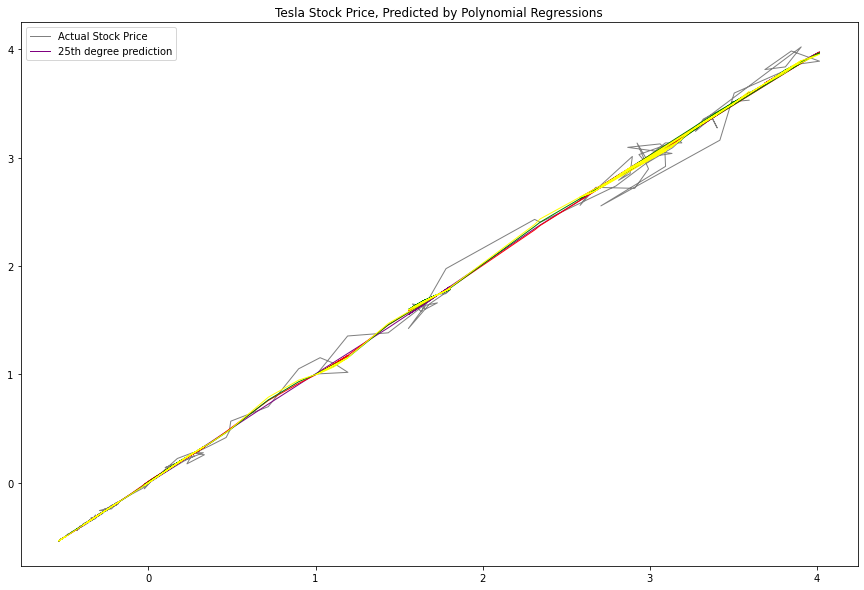

In [38]:
# Degree 2
polyreg = make_pipeline(PolynomialFeatures(2), StandardScaler(), LinearRegression())
polyreg.fit(X_train2, y_train2)
y_pred = polyreg.predict(X_train2)
train2 = metrics.mean_squared_error(y_train2, y_pred)
y_pred2 = polyreg.predict(X_test2)
test2 = metrics.mean_squared_error(y_test2, y_pred2)

# Degree 10
polyreg = make_pipeline(PolynomialFeatures(10), StandardScaler(), LinearRegression())
polyreg.fit(X_train2, y_train2)
y_pred = polyreg.predict(X_train2)
train10 = metrics.mean_squared_error(y_train2, y_pred)
y_pred10 = polyreg.predict(X_test2)
test10 = metrics.mean_squared_error(y_test2, y_pred10)

# Degree 20
polyreg = make_pipeline(PolynomialFeatures(20), StandardScaler(), LinearRegression())
polyreg.fit(X_train2, y_train2)
y_pred = polyreg.predict(X_train2)
train20 = metrics.mean_squared_error(y_train2, y_pred)
y_pred20 = polyreg.predict(X_test2)
test20 = metrics.mean_squared_error(y_test2, y_pred20)

# Degree 50
polyreg = make_pipeline(PolynomialFeatures(50), StandardScaler(), LinearRegression())
polyreg.fit(X_train2, y_train2)
y_pred = polyreg.predict(X_train2)
train50 = metrics.mean_squared_error(y_train2, y_pred)
y_pred50 = polyreg.predict(X_test2)
test50 = metrics.mean_squared_error(y_test2, y_pred50)

# Degree 25
polyreg = make_pipeline(PolynomialFeatures(25), StandardScaler(), LinearRegression())
polyreg.fit(X_train2, y_train2)
y_pred = polyreg.predict(X_train2)
train25 = metrics.mean_squared_error(y_train2, y_pred)
y_pred25 = polyreg.predict(X_test2)
test25 = metrics.mean_squared_error(y_test2, y_pred25)

print('Degree 2, training MSE: {:.5f} and testing MSE: {:.5f}'.format(train2, test2))
print('Degree 10, training MSE: {:.5f} and testing MSE: {:.5f}'.format(train10, test10))
print('Degree 20, training MSE: {:.5f} and testing MSE: {:.5f}'.format(train20, test20))
print('Degree 20, training MSE: {:.5f} and testing MSE: {:.5f}'.format(train25, test25))
print('Degree 50, training MSE: {:.5f} and testing MSE: {:.5f}'.format(train50, test50))

plt.figure(figsize=(15,10))
plt.title('Tesla Stock Price, Predicted by Polynomial Regressions')
plt.plot(X_test2, y_test2, color='gray', linewidth=1)
plt.plot(X_test2, y_pred10, color='purple', linewidth=1)
plt.plot(X_test2, y_pred20, color='red', linewidth=1)
plt.plot(X_test2, y_pred25, color='green', linewidth=1)
plt.plot(X_test2, y_pred50, color='yellow', linewidth=1)
plt.legend(['Actual Stock Price','25th degree prediction'])
plt.show()